In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [17]:
tree_dict = {'回复': [['理查德·戴恩', 'SBV'],
               ['采访', 'VOB'],
               ['，', 'WP'],
               ['讨论', 'COO'],
               ['。', 'WP']],
              '理查德·戴恩': [['发言人', 'ATT']],
              '采访': [['路透社', 'ATT'], ['询问', 'COO']],
              '讨论': [['校方', 'SBV'],
               ['会', 'ADV'],
               ['公开', 'ADV'],
               ['申请', 'COO']],
              '发言人': [['大学', 'ATT']],
              '询问': [['说', 'COO']],
              '会': [['不', 'ADV']],
              '申请': [['入', 'CMP']],
              '大学': [['哈佛', 'ATT']],
              '入': [['情况', 'VOB']],
              '情况': [['学者', 'ATT']]}

In [35]:
plt.rcParams['font.sans-serif']= ['SimHei']

In [86]:
# 定义决策树决策结果的属性，用字典来定义  
# 下面的字典定义也可写作 decisionNode={boxstyle:'sawtooth',fc:'0.8'}  
# boxstyle为文本框的类型，sawtooth是锯齿形，fc是边框线粗细  
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    # annotate是关于一个数据点的文本  
    # nodeTxt为要显示的文本，centerPt为文本的中心点，箭头所在的点，parentPt为指向文本的点 
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args ,fontsize=15)


def getNumLeafs(myTree, tree_dict):
    numLeafs = 0
    firstStr = myTree #即树的一个结点
    secondDict = tree_dict[myTree]  #即该结点的所有子树
    for key in secondDict:
        if key[0] in tree_dict:
            numLeafs += getNumLeafs(key[0], tree_dict)
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree, tree_dict):
    maxDepth = 0
    firstStr = myTree
    secondDict = tree_dict[myTree]
    for key in secondDict:
        if key[0] in tree_dict:
            thisDepth = 1 + getTreeDepth(key[0],tree_dict)
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotTree(myTree, parentPt, nodeTxt, tree_dict):
    numLeafs = getNumLeafs(myTree, tree_dict)  #当前树的叶子数
    depth = getTreeDepth(myTree, tree_dict) #没有用到这个变量
    firstStr = myTree 
    #cntrPt文本中心点   parentPt 指向文本中心的点 
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    #print(cntrPt, myTree)
    plotMidText(cntrPt, parentPt, nodeTxt) #画分支上的键
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = tree_dict[myTree]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD #从上往下画
    for key in secondDict:
        if key[0] in tree_dict: #如果不是叶子节点
            plotTree(key[0],cntrPt,key[1], tree_dict)       
        else:   #打印叶子结点
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW #
            plotNode(key[0], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, key[1])
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD 

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    #print(txtString, parentPt, cntrPt)
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center",fontsize=15)


def createPlot(inTree, tree_dict):
    fig = plt.figure(1, facecolor='white',figsize=(10,10))
    axprops = dict(xticks=[], yticks=[])# 定义横纵坐标轴，无内容  
    #createPlot.ax1 = plt.subplot(111, frameon=False, **axprops) # 绘制图像,无边框,无坐标轴  
    createPlot.ax1 = plt.subplot(111, frameon=False) 
    plotTree.totalW = float(getNumLeafs(inTree, tree_dict))   #全局变量宽度 = 叶子数
    plotTree.totalD = float(getTreeDepth(inTree,tree_dict))  #全局变量高度 = 深度
    #图形的大小是0-1 ，0-1
    plotTree.xOff = -0.5/plotTree.totalW;  #例如绘制3个叶子结点，坐标应为1/3,2/3,3/3
    #但这样会使整个图形偏右因此初始的，将x值向左移一点。
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5,1.0), '', tree_dict)
    plt.show()


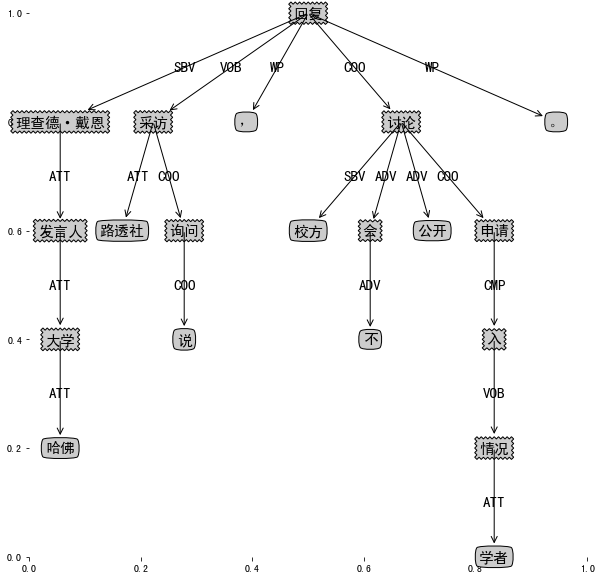

In [87]:
getNumLeafs('回复',tree_dict)
createPlot('回复',tree_dict)

In [102]:
from plottree import plottree

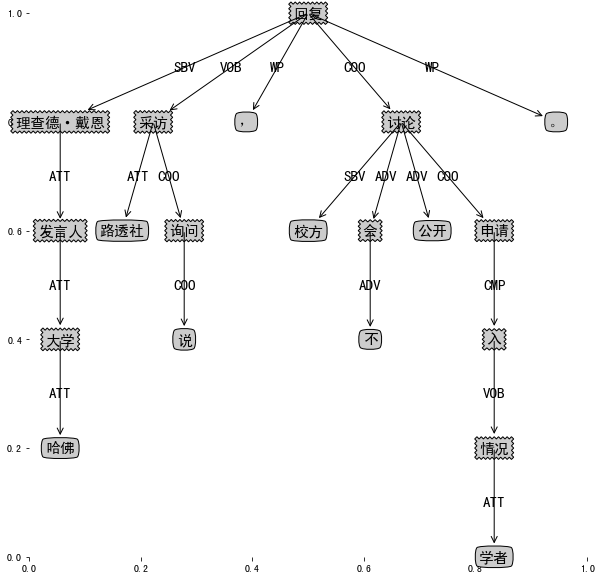

In [103]:
plottree.createPlot('回复',tree_dict)